In [152]:
import numpy as np, pandas as pd, json, os, datetime, time
from xgboost import XGBClassifier, plot_importance
import xgboost as xgb
import multiprocessing as mp
import pickle

from sklearn.metrics import confusion_matrix
from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV
import matplotlib.pyplot as plt

def json_to_dic(path):
    with open(path, 'r') as f:
        dic = json.load(f)
        f.close()
    return dic

def source_dic_to_res_folder(source_dic):
    vi = source_dic['input'].upper()
    vl = source_dic['label'].upper()
    return f'input{vi}_label{vl}'

# train

C:\Users\Paul Noailly\anaconda3\envs\xgboost\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-logloss:0.56009	validation_0-auc:0.90868	validation_0-error:0.16615	validation_1-logloss:0.53359	validation_1-auc:0.94324	validation_1-error:0.12642
[1]	validation_0-logloss:0.48589	validation_0-auc:0.91443	validation_0-error:0.16170	validation_1-logloss:0.44402	validation_1-auc:0.94806	validation_1-error:0.12258
[2]	validation_0-logloss:0.44123	validation_0-auc:0.91585	validation_0-error:0.16141	validation_1-logloss:0.39857	validation_1-auc:0.94705	validation_1-error:0.12228
[3]	validation_0-logloss:0.41240	validation_0-auc:0.91755	validation_0-error:0.16051	validation_1-logloss:0.37058	validation_1-auc:0.94528	validation_1-error:0.12162
[4]	validation_0-logloss:0.39292	validation_0-auc:0.91924	validation_0-error:0.15908	validation_1-logloss:0.34422	validation_1-auc:0.94712	validation_1-error:0.12237
[5]	validation_0-logloss:0.37903	validation_0-auc:0.92073	validation_0-error:0.15791	validation_1-logloss:0.32519	validation_1-auc:0.94852	validation_1-error:0.12144
[6]	

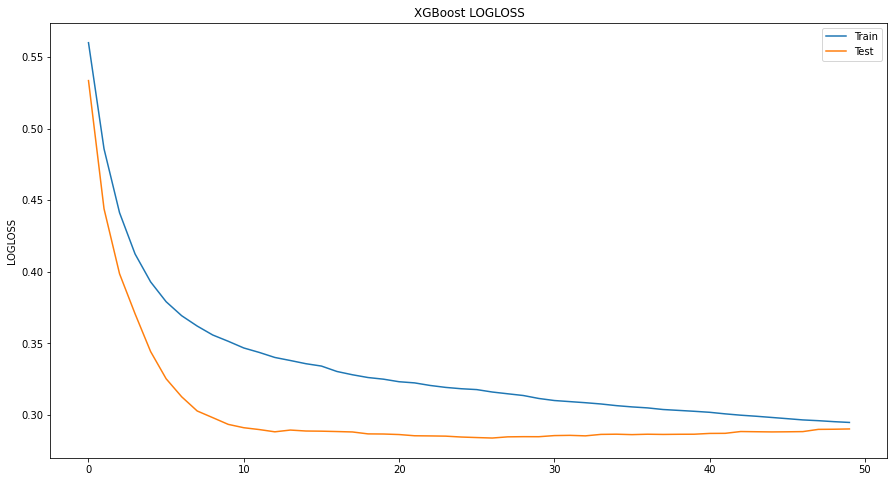

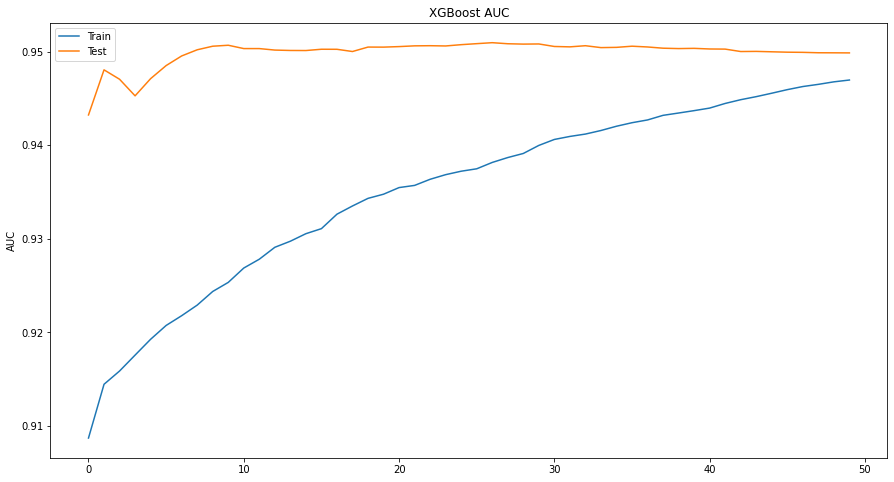

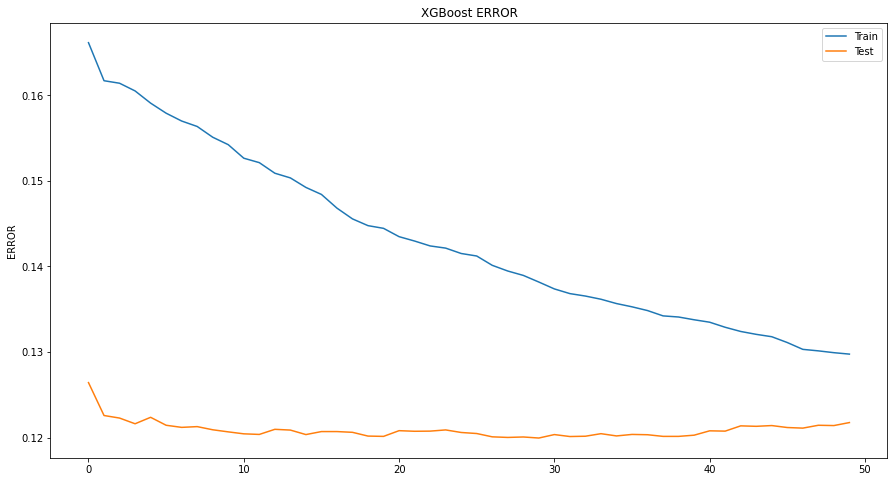

In [153]:
source_dic = json_to_dic('datas/source.json')

X = np.load('datas/x.npy')
y = np.load('datas/y.npy')

X_train, X_test, y_train, y_test = train_test_split(X, y, 
            test_size = 0.2, 
            shuffle=False)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, 
                  test_size = 0.4, 
                  shuffle=False)
#X_train, X_val, X_test, y_train, y_val, y_test = np.array(X_train), np.array(X_val), np.array(X_test), np.array(y_train), np.array(y_val), np.array(y_test)



param_dist = {'objective': 'binary:logistic', # reg:squarederror, binary:logistic, multi:softmax (for more than 2 issue)
             'use_label_encoder': True,
             'base_score': 0.5,
             'booster': 'gbtree', #  gbtree, gblinear or dart
             'colsample_bylevel': 1,
             'colsample_bynode': 1,
             'colsample_bytree': 1,
             'gamma': 0,
             'gpu_id': -1,
             'importance_type': 'gain',
             'interaction_constraints': '',
             'learning_rate': 0.3,
             'max_delta_step': 0,
             'max_depth': 6,
             'min_child_weight': 1,
             'monotone_constraints': '()',
             'n_estimators': 50,
             'n_jobs': 8,
             'num_parallel_tree': 1,
             'random_state': 0,
             'reg_alpha': 0,
             'reg_lambda': 1,
             'scale_pos_weight': 1,
             'subsample': 1,
             'tree_method': 'auto', # auto, exact, 
             'validate_parameters': 1,
             'verbosity': None}

clf = xgb.XGBClassifier(**param_dist)

list_eval_metrics = ['logloss',"auc","error"]

clf.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        eval_metric=list_eval_metrics,
        verbose=True)




evals_result = clf.evals_result()
epochs = len(evals_result['validation_0']['auc'])
x_axis = range(0, epochs)

for metric in list_eval_metrics:
    fig, ax = plt.subplots()
    ax.plot(x_axis, evals_result['validation_0'][metric], label='Train')
    ax.plot(x_axis, evals_result['validation_1'][metric], label='Test')
    ax.legend()
    plt.ylabel(f'{metric.upper()}')
    plt.title(f'XGBoost {metric.upper()}')
    plt.show()

# metrics

In [154]:
print('Acc val: {:.2%}'.format(accuracy_score(clf.predict(X_val), y_val)))
print('Acc test: {:.2%}'.format(accuracy_score(clf.predict(X_test), y_test)))
print()
print('Preci val: {:.2%}'.format(precision_score(clf.predict(X_val), y_val)))
print('Preci test: {:.2%}'.format(precision_score(clf.predict(X_test), y_test)))
print()
print('Recall val: {:.2%}'.format(recall_score(clf.predict(X_val), y_val)))
print('Recall test: {:.2%}'.format(recall_score(clf.predict(X_test), y_test)))
print()
print('F1 val: {:.2%}'.format(f1_score(clf.predict(X_val), y_val)))
print('F1 test: {:.2%}'.format(f1_score(clf.predict(X_test), y_test)))
print()
print('kappa val: {:.2%}'.format(cohen_kappa_score(clf.predict(X_val), y_val)))
print('kappa test: {:.2%}'.format(cohen_kappa_score(clf.predict(X_test), y_test)))
print()
print('auc val: {:.2%}'.format(roc_auc_score(clf.predict(X_val), y_val)))
print('auc test: {:.2%}'.format(roc_auc_score(clf.predict(X_test), y_test)))

confusion_matrix(clf.predict(X_test), y_test)

Acc val: 84.87%
Acc test: 87.82%

Preci val: 83.40%
Preci test: 85.19%

Recall val: 85.29%
Recall test: 89.28%

F1 val: 84.34%
F1 test: 87.19%

kappa val: 69.70%
kappa test: 75.60%

auc val: 84.88%
auc test: 87.92%


array([[26435,  4104],
       [ 2834, 23610]], dtype=int64)

# backtest (no fees)

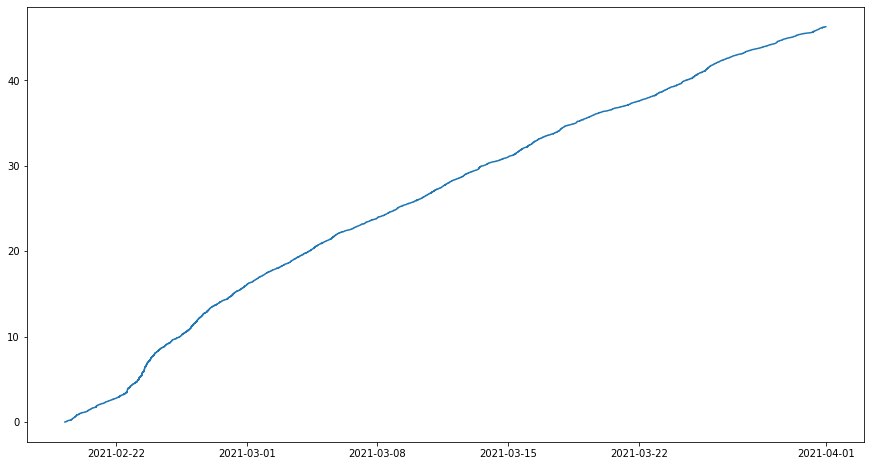

In [155]:
pnl = np.load('datas/pnl.npy')
dates = np.load('datas/dates.npy')

max_pnl = pnl[-len(y_test):] * (y_test * 2 + 1)
test_pnl = pnl[-len(y_test):] * (clf.predict(X_test) * 2 + 1)
test_dates = dates[-len(y_test):]

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,8)
plt.plot(test_dates, test_pnl.cumsum(), label='raw')

In [156]:
print('sharpe:', test_pnl.mean()/ test_pnl.std())

sharpe: 0.27822467498457126


In [157]:
print('mean pnl: {:.3%}'.format(test_pnl.mean()))

mean pnl: 0.081%
